In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import plotly.express as px # to create interactive visualizations
from plotly.offline import init_notebook_mode, iplot
import os
import matplotlib.pyplot as plt
import seaborn as sns
init_notebook_mode(connected = True)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


## World Happiness Dataset 2021 
  

## Definitions of measured parameters
**Ladder score** : The rankings of national happiness are based on a **Cantril ladder survey**. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale.

**Logged GDP per capita** : Log10 value of the GDP per Capita of the country.This is arguably the most accepted method of determining a country’s level of wealth. And as most of you know, a country’s wealth is highly correlated to its happiness

**Social support** : Social support schemes being implemented by Government and other organizations.If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?” People were only able to answer with a yes or no. A yes would equal 1 and a no would equal 0. The average of all answers results in a single value that represents the amount of social support that is present in a country.

**Healthy life expectancy** : The healthy life expectancy measure adds a 'quality of life' dimension to estimates of life expectancy by dividing it into time spent in different states of health. The number of years of life in poor health is also important as it relates more closely to the demand for health and social care and the associated costs

**Freedom to make life choices** : “Freedom to make life choices” is the national average of responses to the question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

**Generosity** : Have you donated money to a charity in the past month?”
Again, the average of all responses (yes being 1 and no being 0) determines the output of this key factor.It can also be a charitable work from an individual in other terms too.

**Perceptions of corruption** : “Perceptions of corruption” is also determined as a key factor in the Happiness Index. It is calculated by averaging the answers to the following 2 questions:
“Is corruption widespread throughout the government or not?”
“Is corruption widespread within businesses or not?”
 Again, the average of all answers determines the outcome of this factor per country 
 
 **Dystopia+Residual**: Dystopia happiness score is the score of a hypothetical country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country (a number that is left over from the normalization of the variables which cannot be explained).**Residual is the unexplained happiness which cannot be measured like that!!**
 
 Credits: trackinghappiness.com

In [21]:
data=pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv')
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


 # - Visualization Project - using Seaborn and Plotly

#### Ladder score is the total score used for ranking

In [22]:
all=data['Country name']
df=pd.DataFrame([data['Ladder score'],data['Country name']]).T.sort_values(by='Ladder score')
df.head()

,Ladder score,Country name
148,2.523,Afghanistan
147,3.145,Zimbabwe
146,3.415,Rwanda
145,3.467,Botswana
144,3.512,Lesotho


### Let's visualize the countries in order of their happiness index

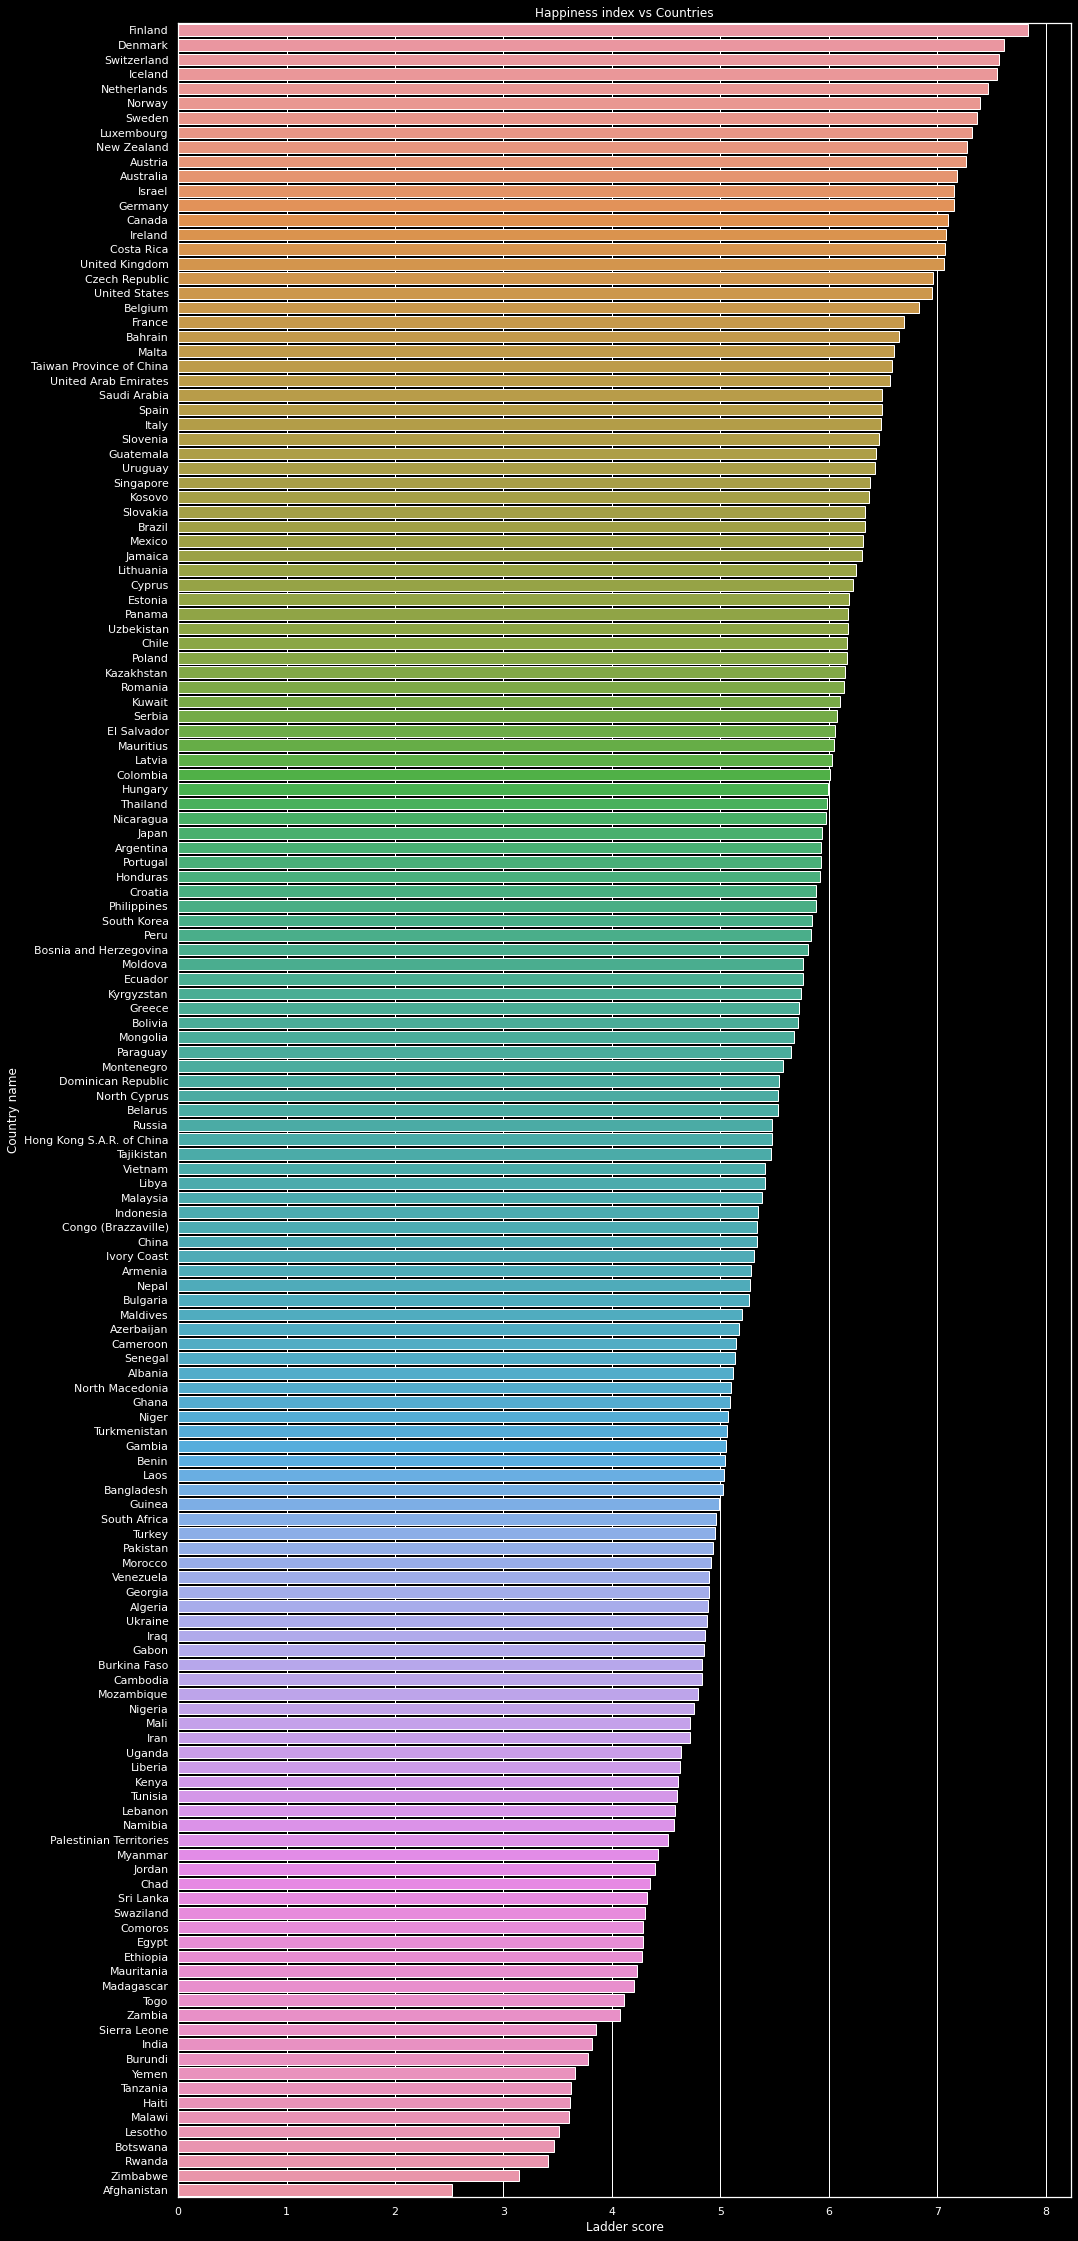

In [23]:
sns.set(rc={'figure.figsize':(16,40)})
sns.set_style("darkgrid")
plt.style.use("dark_background")
plt.title("Happiness index vs Countries")
sns.barplot(data=df.sort_values(by=['Ladder score'],ascending=False),x='Ladder score',y='Country name');

## Ladder score vs Countries with Plotly interactive viz

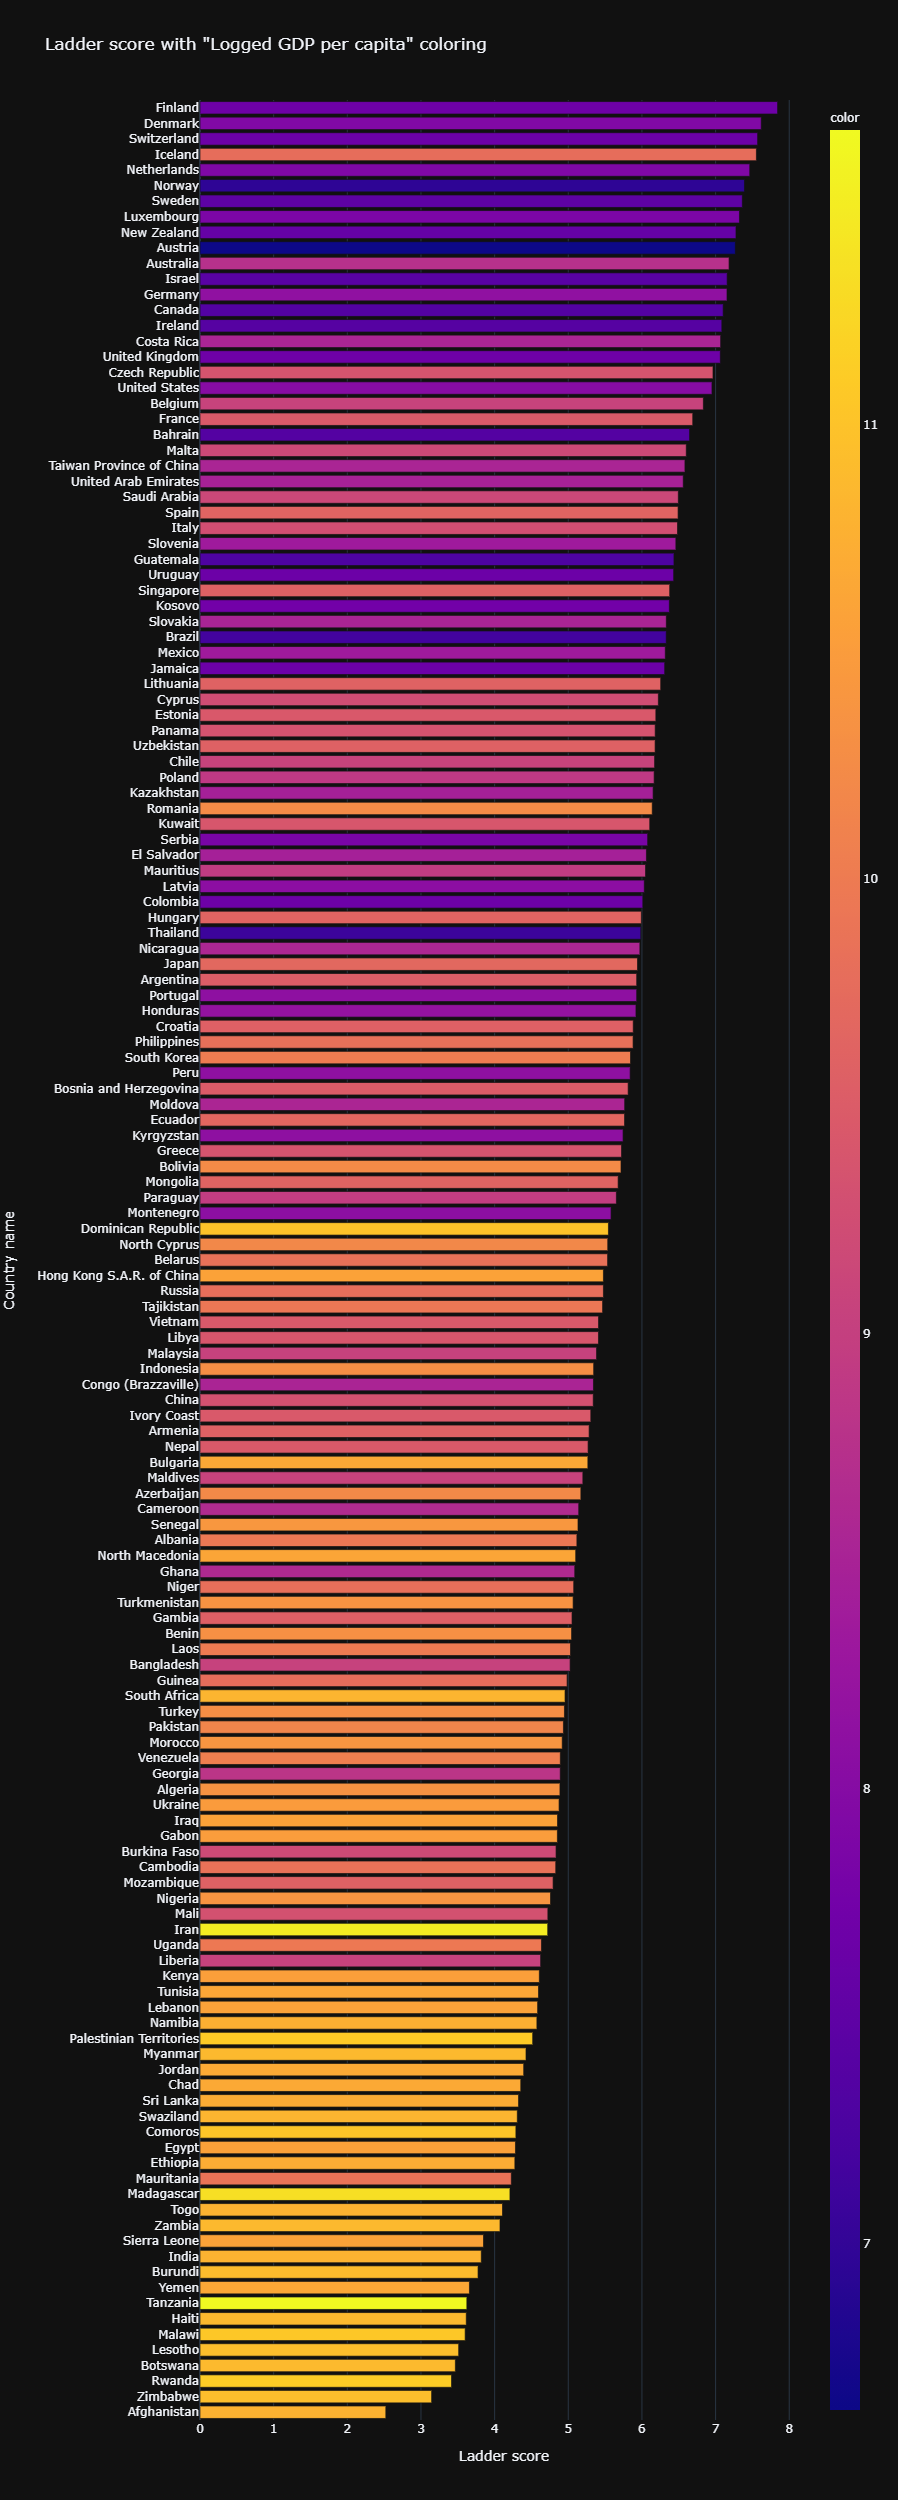

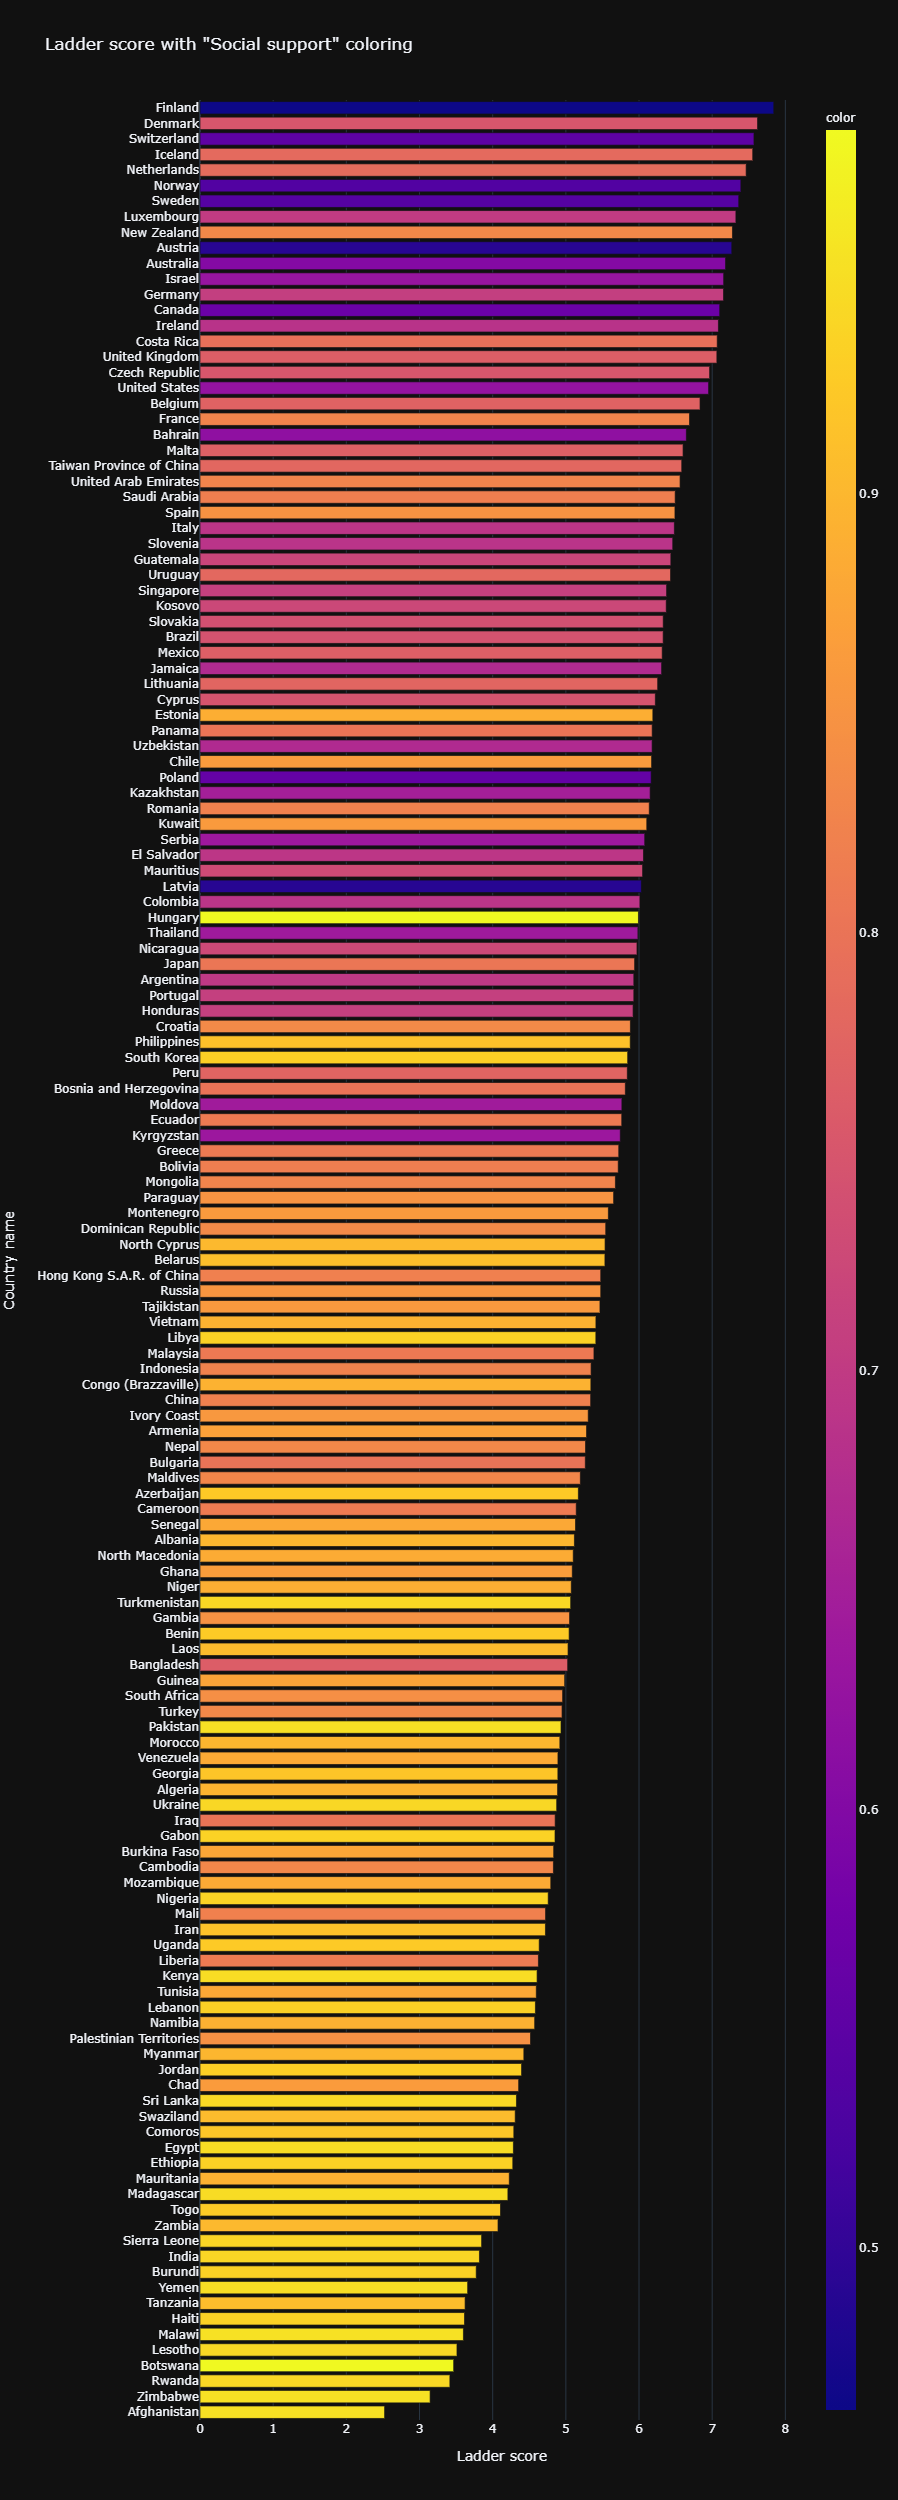

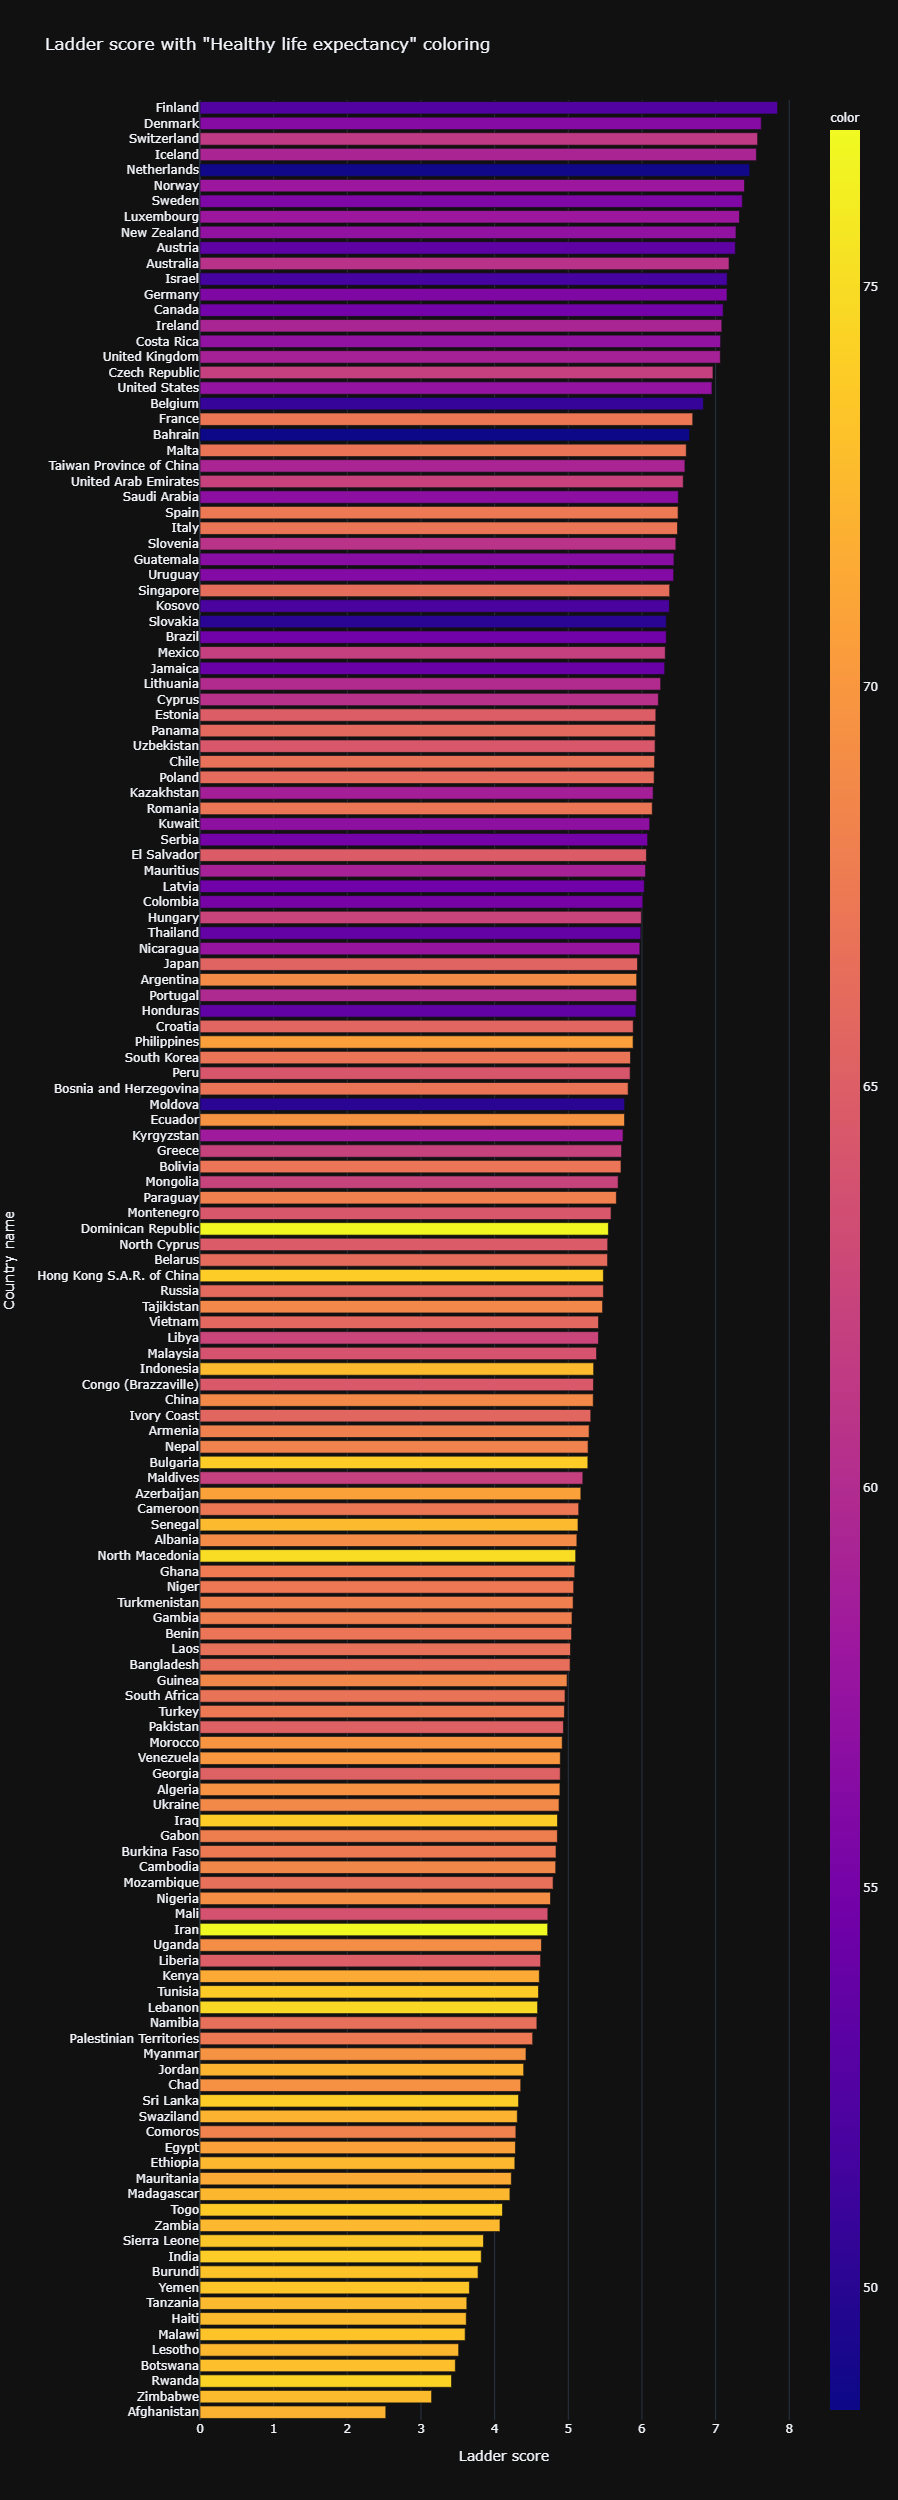

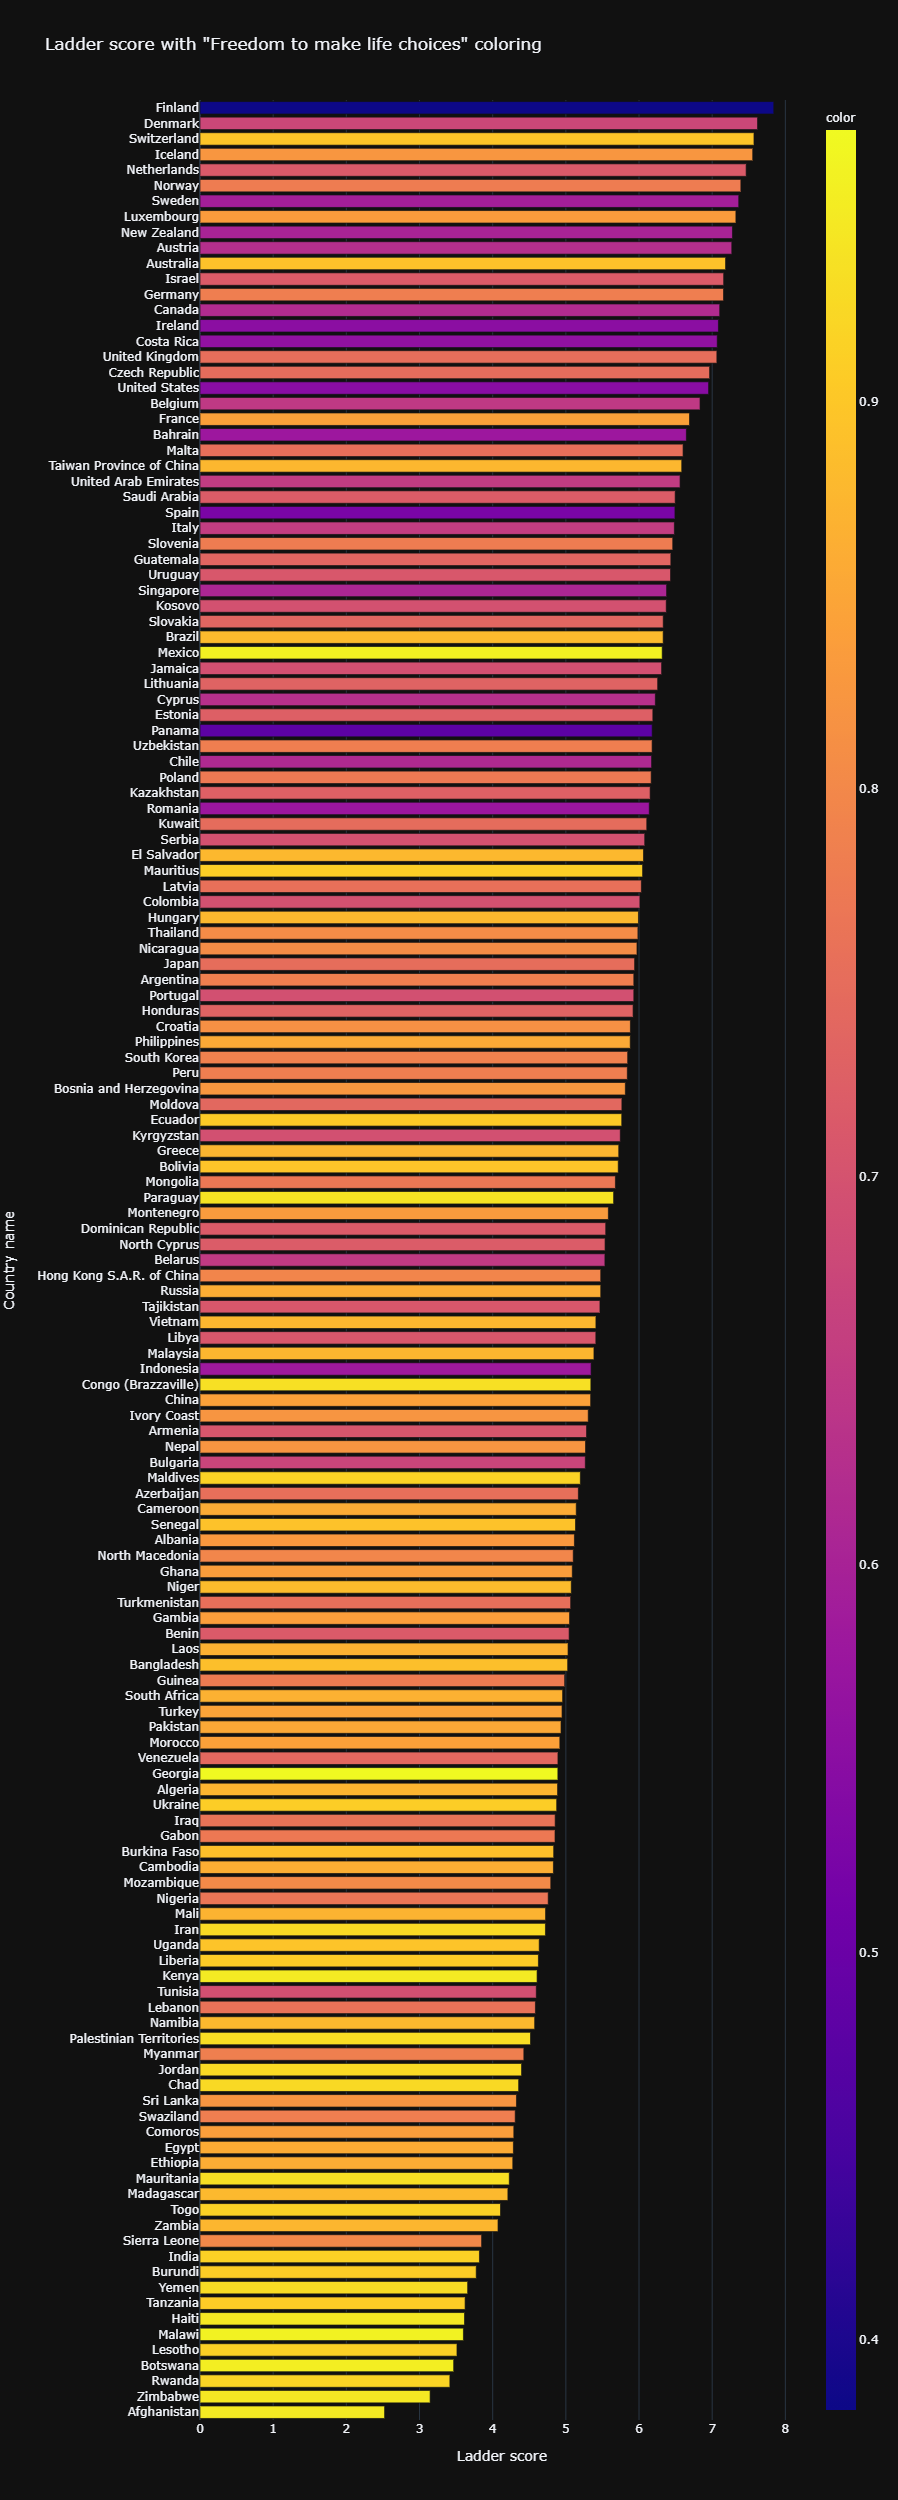

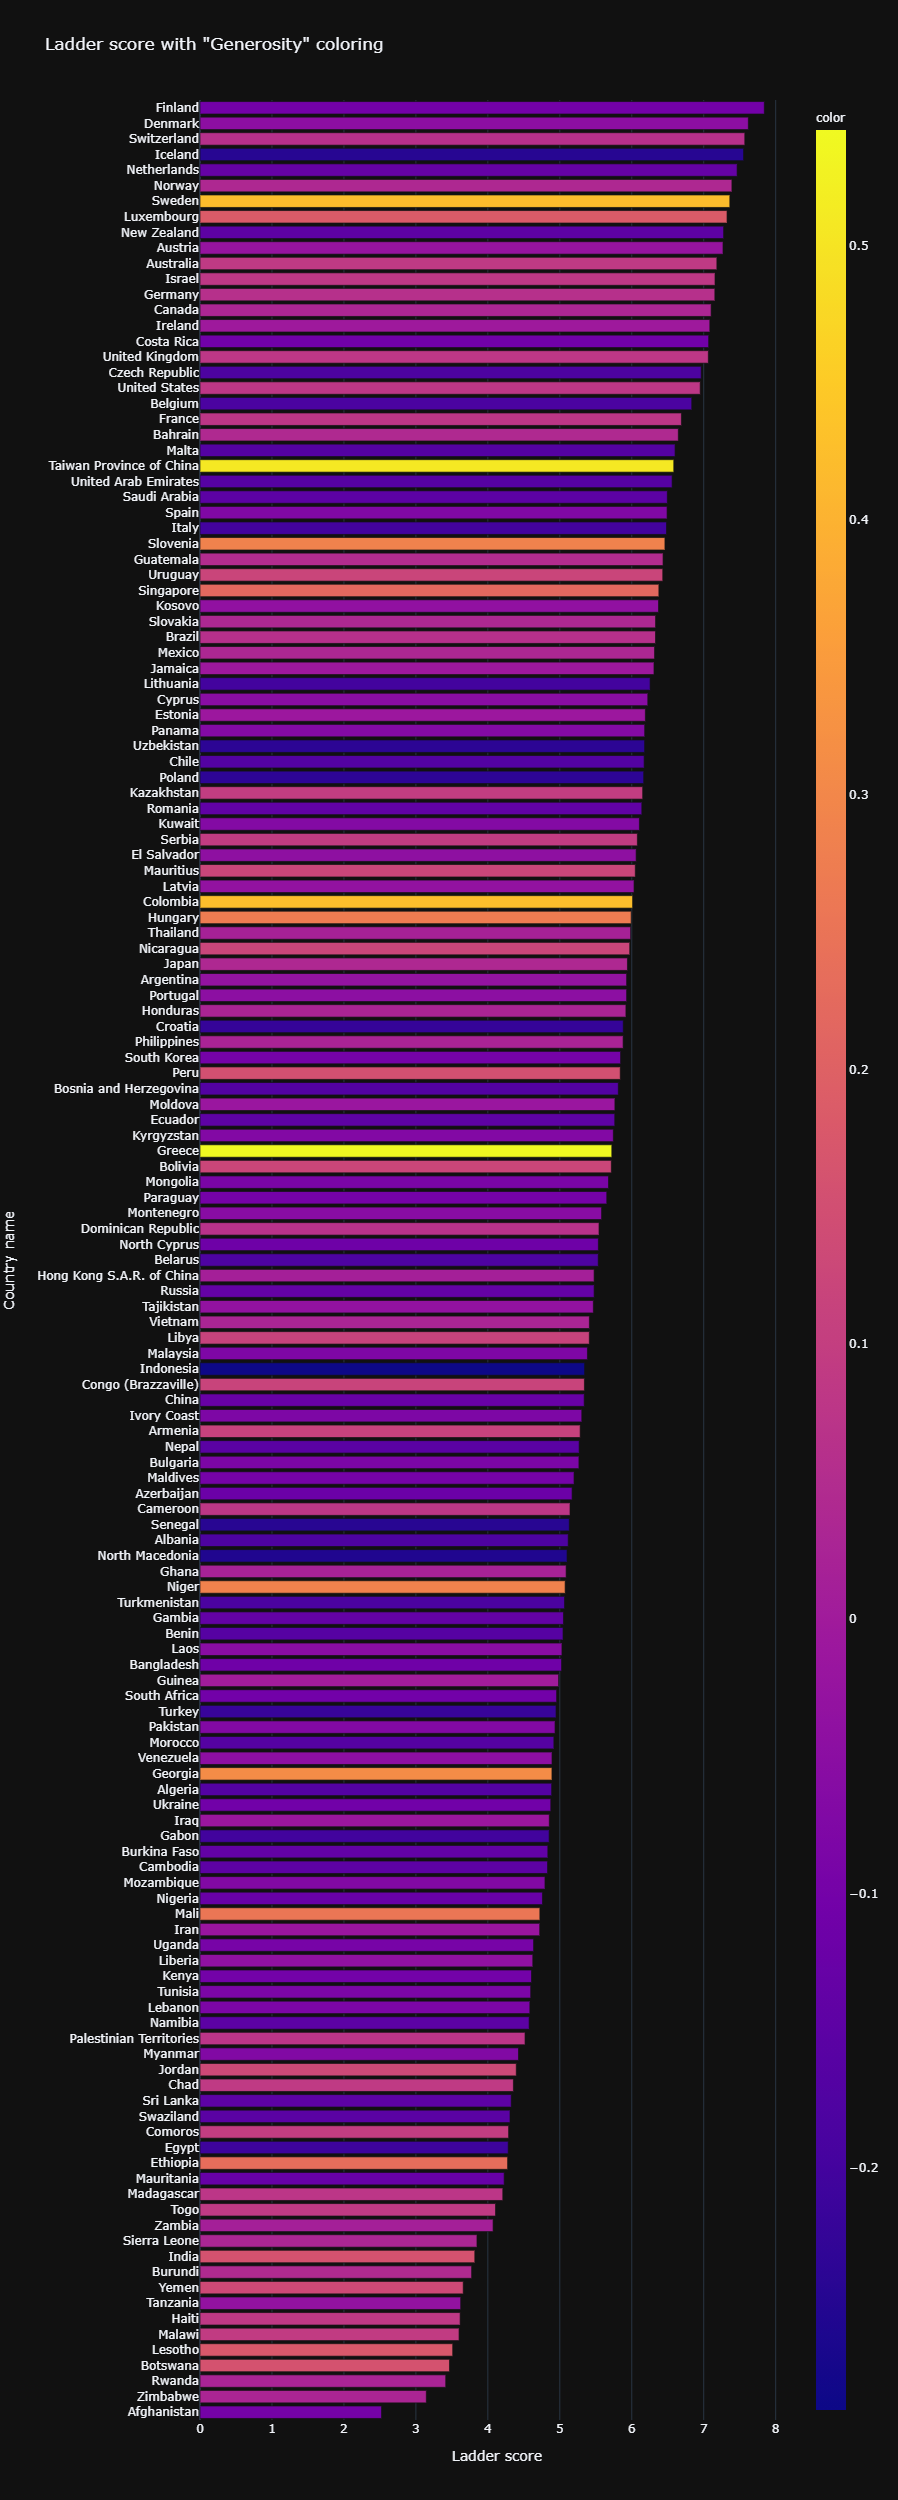

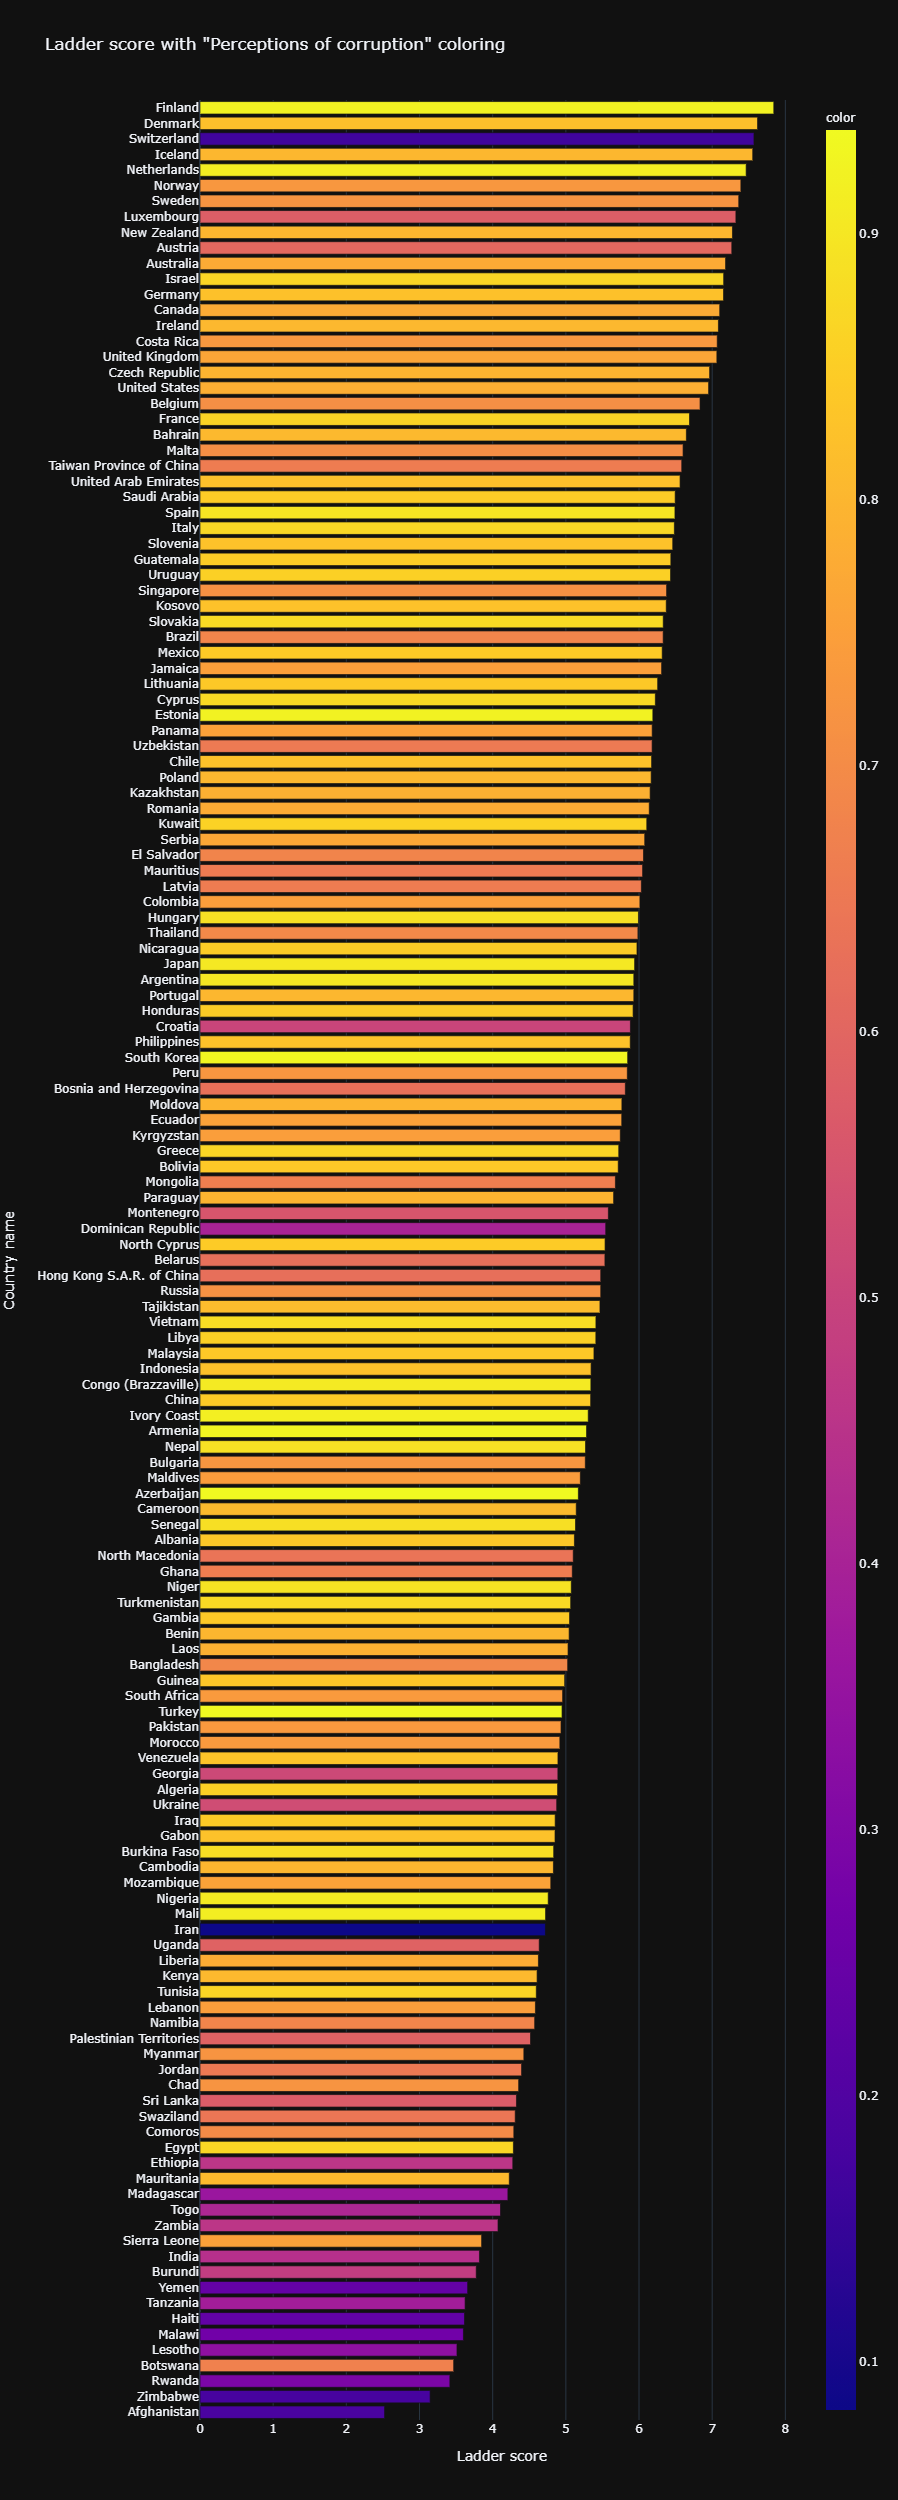

In [24]:
for parameter in data.columns[6:12]:
    figg=px.bar(df,x='Ladder score',y='Country name',color=data[parameter],orientation='h',height=2500,title=f'Ladder score with "{parameter}" coloring ') 
    figg.update_layout(template='plotly_dark')
    figg.show()

### Visualization of correlation using Heatmap

<AxesSubplot:>

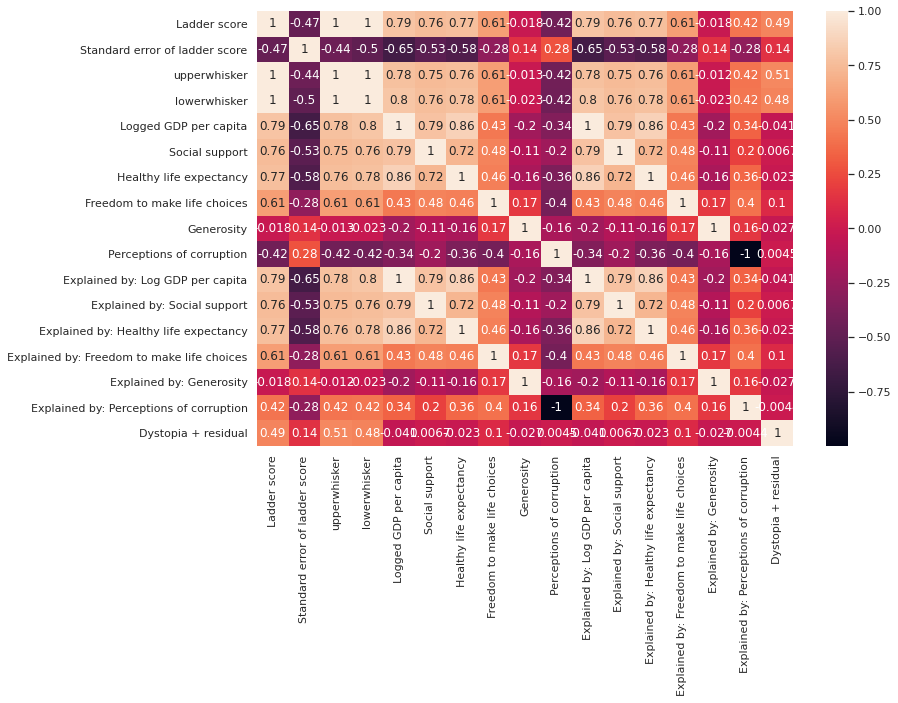

In [25]:
import seaborn as sns
import plotly.express as px
sns.set(rc={'figure.figsize':(12,8)})
data.drop(columns=['Ladder score in Dystopia'],inplace=True)
sns.heatmap(data.iloc[:,2:].corr(),annot=True)


In [26]:
corrvalues=[]
for feature in data.columns[6:]:
    laddercorr=data['Ladder score'].corr(data[feature])
    corrvalues.append(laddercorr)
corrvalues.sort(reverse=True)
corrvalues

[0.7897596965098931,
 0.7897447001367904,
 0.7681378781936494,
 0.7680994550105206,
 0.7568876453634998,
 0.7568686877284436,
 0.6077929208739884,
 0.6077530656580246,
 0.49200989823161273,
 0.42120542914325027,
 -0.017631035813746036,
 -0.017799276922640765,
 -0.4211399967385785]

## Correlation bar chart for parameters used in measuring Happiness index

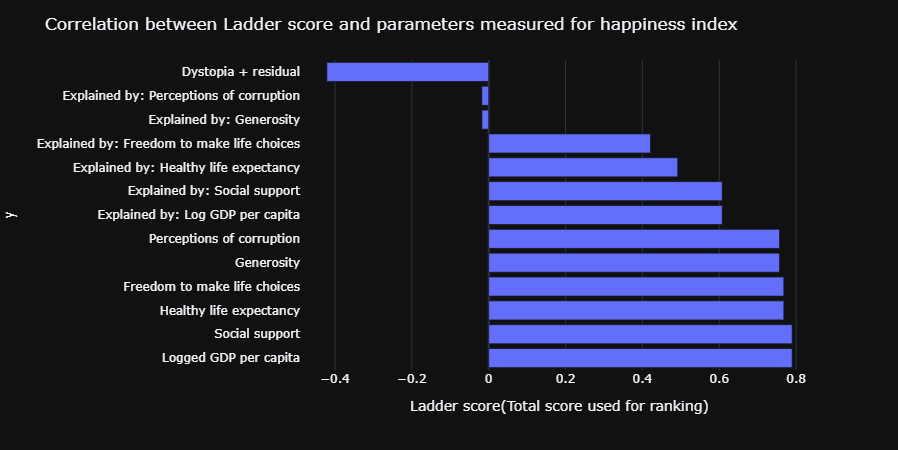

In [27]:
fig=px.bar(x=corrvalues,y=data.columns[6:],labels={'x':'Ladder score(Total score used for ranking)'},barmode='group')
fig.update_layout(template='plotly_dark',title='Correlation between Ladder score and parameters measured for happiness index')

### Grouping by region where the countries are located with their average Ladder score

In [28]:
region=data.groupby(['Regional indicator']).mean().drop(columns=['Standard error of ladder score','upperwhisker','lowerwhisker','Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption'])
region=pd.DataFrame(region)
region.reset_index()
regions=list(region.index.values)
region

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Regional indicator,,,,,,,,
Central and Eastern Europe,5.984765,10.109059,0.887412,68.338412,0.797059,-0.078941,0.850529,2.490000
Commonwealth of Independent States,5.467000,9.401833,0.872500,65.009500,0.816917,-0.036000,0.725083,2.225750
East Asia,5.810333,10.367667,0.860500,71.252167,0.763500,-0.062333,0.683333,2.117833
Latin America and Caribbean,5.908050,9.370000,0.839500,67.076050,0.831750,-0.067700,0.792600,2.733000
Middle East and North Africa,5.219765,9.666118,0.797647,65.609118,0.716471,-0.079765,0.762235,2.210588
North America and ANZ,7.128500,10.809500,0.933500,72.325000,0.898750,0.120000,0.449250,2.650500
South Asia,4.441857,8.682571,0.703429,62.681000,0.765000,0.042714,0.797429,1.964000
Southeast Asia,5.407556,9.421444,0.820333,64.888444,0.909000,0.156333,0.709111,2.033444
Sub-Saharan Africa,4.494472,8.075194,0.696750,55.886472,0.723194,0.013444,0.765944,2.507722


### Country region and their Happiness index using averaged Ladder scores of that region

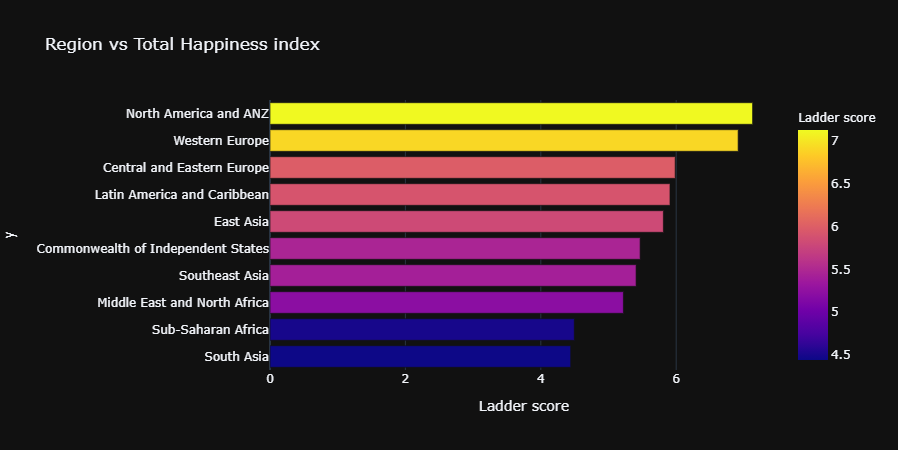

In [29]:
fig_region=px.bar(region,y=regions,x='Ladder score',color=region['Ladder score'],orientation='h',title='Region vs Total Happiness index').update_yaxes(categoryorder='total ascending')
fig_region.update_layout(template='plotly_dark')
fig_region.show()

#### Lower number of countries gave a higher ladder score to North America and ANZ

In [30]:
data[data['Regional indicator']=='North America and ANZ']

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,1.400,1.094,0.785,0.665,0.276,0.445,2.612
10,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.9,0.914,0.159,0.442,1.453,1.076,0.801,0.647,0.291,0.317,2.598
13,Canada,North America and ANZ,7.103,0.042,7.185,7.021,10.776,0.926,73.8,0.915,0.089,0.415,1.447,1.044,0.798,0.648,0.246,0.335,2.585
18,United States,North America and ANZ,6.951,0.049,7.047,6.856,11.023,0.920,68.2,0.837,0.098,0.698,1.533,1.030,0.621,0.554,0.252,0.154,2.807


### Pycountry is imported to render a world map using ISO Alpha 3 key codes for countries

In [31]:
import pycountry
input_countries = list(data['Country name'])
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

#print(codes)  
data['Country code']=codes


### Choropleth map to visualize happiness index in a world map

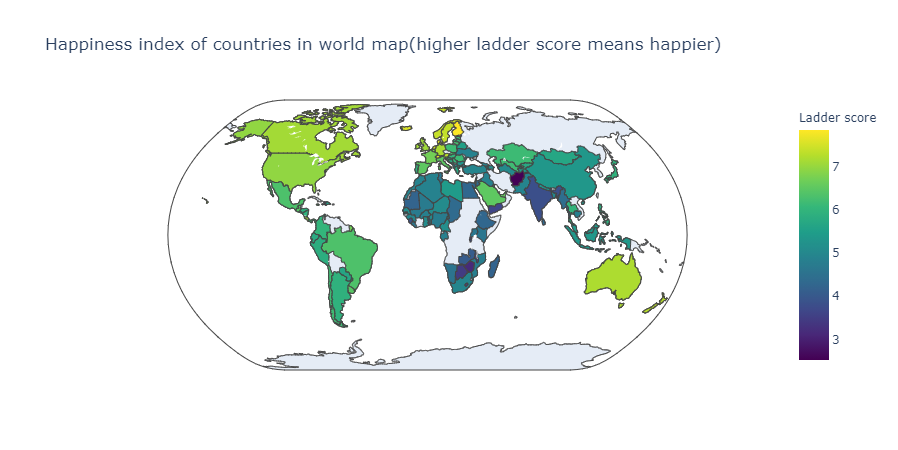

In [32]:
chorofig=px.choropleth(data.drop(columns=['Regional indicator']),locations=data['Country code'],color='Ladder score',projection='natural earth',color_continuous_scale='Viridis',title='Happiness index of countries in world map(higher ladder score means happier)')
chorofig.show()

### Highly interactive Sunburst Chart from Plotly with Social support gradient
##### Hover and click to expand the chart and see the details

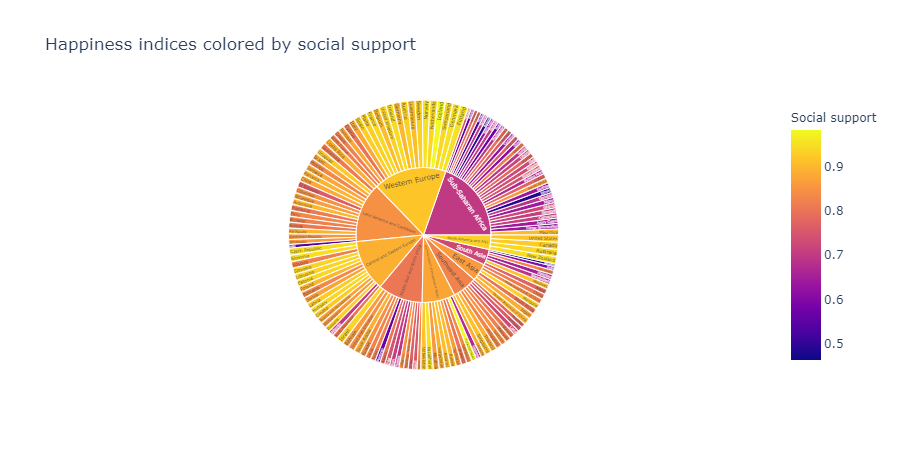

In [33]:
sunburst=px.sunburst(data,path=['Regional indicator','Country name'],values=data['Ladder score'],color='Social support',title='Happiness indices colored by social support')
sunburst.show()

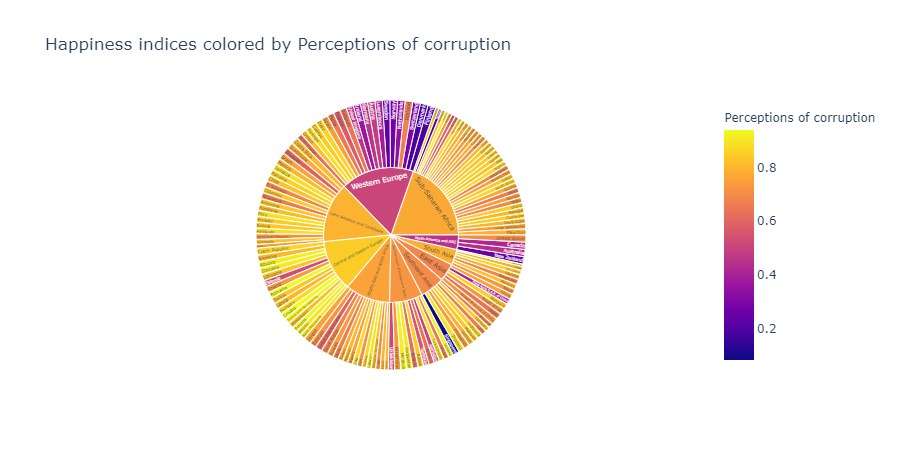

In [34]:
sunburst=px.sunburst(data,path=['Regional indicator','Country name'],values=data['Ladder score'],color='Perceptions of corruption',title='Happiness indices colored by Perceptions of corruption')
sunburst.show()

## Let's see the amount of happiness explained by these factors for each country
#### Sum of all "Explained" values = total Ladder score

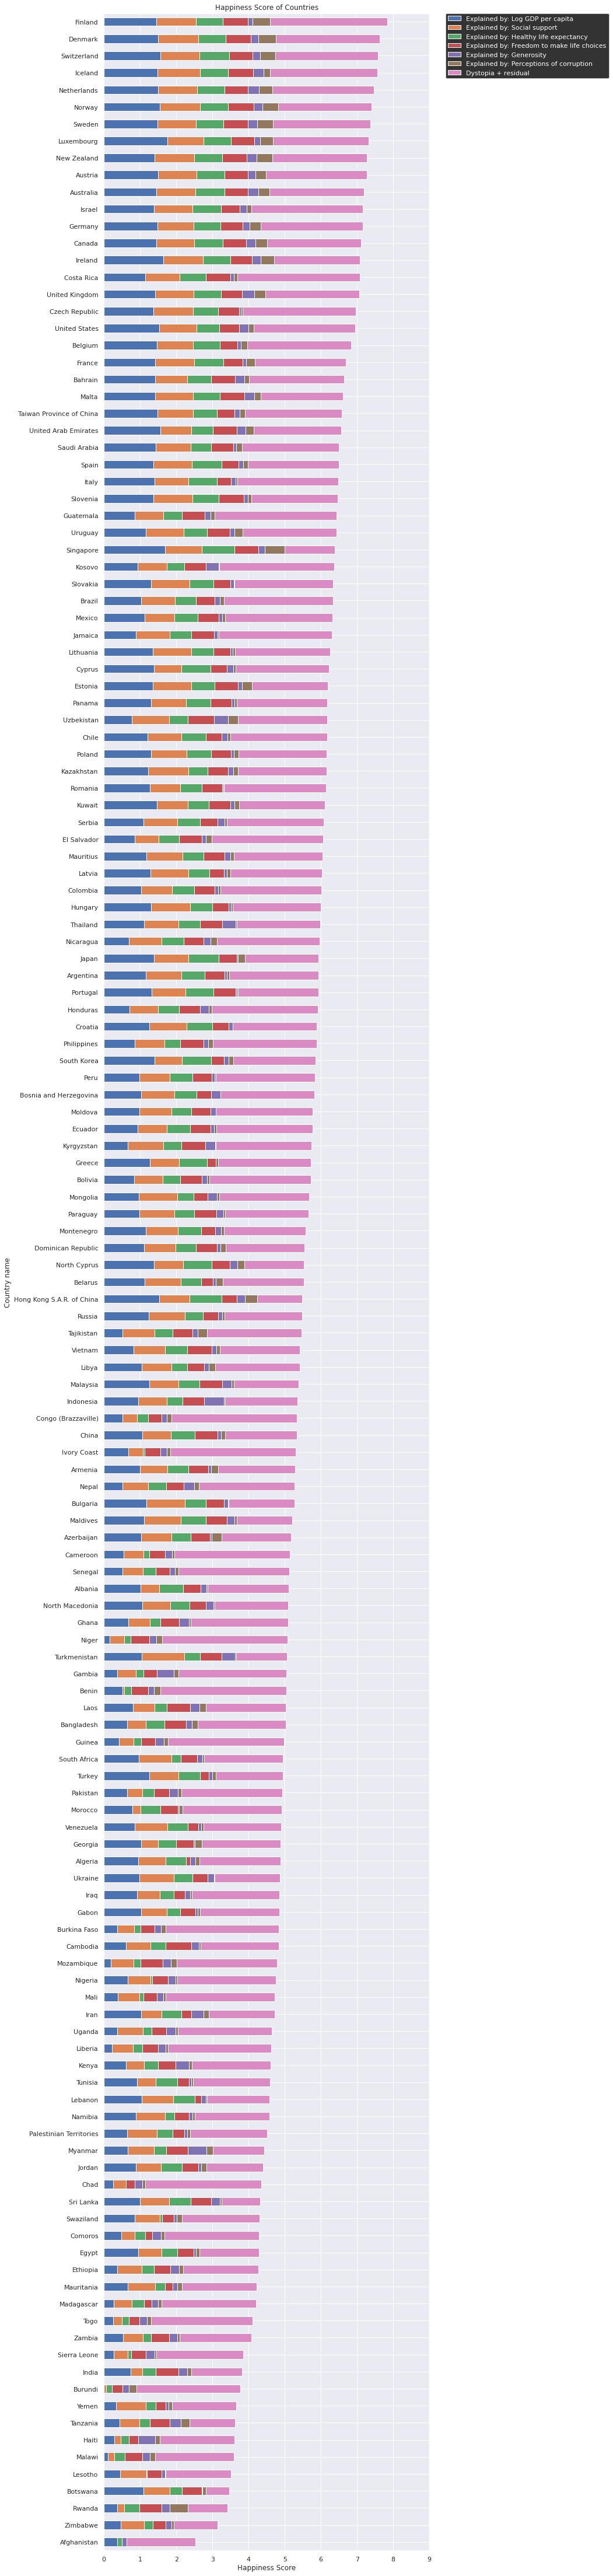

In [35]:
plotsum = data[['Country name','Ladder score','Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']].sort_values(by=['Ladder score'])
plotsum.set_index('Country name').drop(columns=['Ladder score']).plot(kind='barh',xticks=np.arange(10), stacked=True, figsize= (10,80))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of Countries')
plt.style.use(['dark_background'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### __ Abhishek __